### Introduction

Here I'll try to recover original audio sources form mixed audio signals.

In [8]:
import numpy as np
import scipy.io
from sklearn.metrics import mutual_info_score
from statsmodels.sandbox.distributions.mv_measures import mutualinfo_kde, mutualinfo_binned
import scipy.stats as stats
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity
from scipy.io.wavfile import write as save_audio

from jade import jadeR

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
def _f(m):
    '''Flat matrix'''
    return np.asarray(m).flatten()

def get_mi_matrix(signal, kde=False, n_bins=None):
    rows, cols = signal.shape
    mat = np.zeros((rows, rows))
    np.fill_diagonal(mat, 1)
    # Upper diagonal
    for r in range(rows):
        for c in range(r, rows):
            if r == c:
                continue
            p, q = _f(signal[r]), _f(signal[c])
            if kde:
                mi = mutualinfo_kde(p, q)
            else:
                if n_bins is None:
                    p_bins = len(np.histogram(p, bins='fd')[0])
                    q_bins = len(np.histogram(q, bins='fd')[0])
                    n_bins = min(p_bins, q_bins)
                mi = mutualinfo_binned(p, q, n_bins)[0]
            mat[r][c] = mi
            mat[c][r] = mi

    return mat

In [3]:
from IPython.display import Audio
FS = 44100

#### Run #01

In [4]:
audio_1 = scipy.io.loadmat('audio/audioRun1.mat')['X1']
print (audio_1.shape)

(3, 266240)


In [5]:
save_audio('audio/audio1.wav', FS, audio_1[1].T)
Audio(audio_1[1], rate=FS)

#### Jade

Number of iter: 11
CPU times: user 610 ms, sys: 46.6 ms, total: 656 ms
Wall time: 641 ms


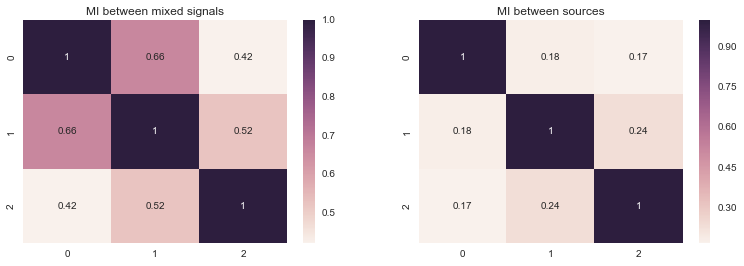

In [64]:
%%time
B = jadeR(audio_1)
S = B * np.matrix(audio_1)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(audio_1, kde=False, n_bins=50), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=50), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

#### Components

It's easy to see how mutual information between signal is much higher before than after Jade.
We can indeed hear components and confirm that our separation was pretty decent (of course we should have explored other measures to be more rigorous about this 'pretty decent')

In [65]:
save_audio('audio/ic0_audio1.wav', FS, S[0].T)
Audio(S[0], rate=FS)

In [66]:
save_audio('audio/ic1_audio1.wav', FS, S[1].T)
Audio(S[1], rate=FS)

In [67]:
save_audio('audio/ic2_audio1.wav', FS, S[2].T)
Audio(S[2], rate=FS)

#### Run #02

In [69]:
audio_2 = scipy.io.loadmat('audio/audioRun2.mat')['X2']
print (audio_2.shape)

(3, 266240)


In [70]:
save_audio('audio/audio2.wav', FS, audio_2[0].T)
Audio(audio_2[0], rate=FS)

#### Jade

Number of iter: 11
CPU times: user 604 ms, sys: 55.9 ms, total: 660 ms
Wall time: 646 ms


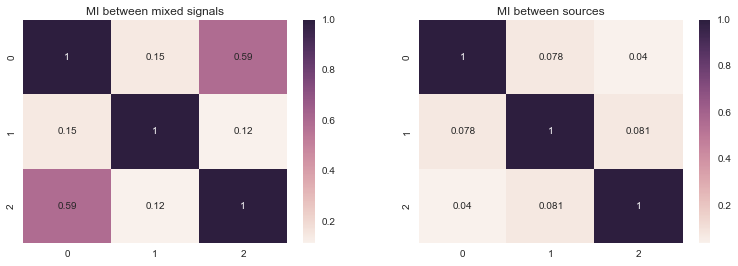

In [76]:
%%time
B = jadeR(audio_2)
S = B * np.matrix(audio_2)

fig, axs = plt.subplots(1, 2, figsize=(13, 4))

sns.heatmap(get_mi_matrix(audio_2, kde=False, n_bins=10), ax=axs[0], annot=True)
axs[0].set_title('MI between mixed signals')
sns.heatmap(get_mi_matrix(S, kde=False, n_bins=10), ax=axs[1], annot=True)
axs[1].set_title('MI between sources')

#### Components

Same as above, we can see how MI is lower after JADE.

In [77]:
save_audio('audio/ic0_audio2.wav', FS, S[0].T)
Audio(S[0], rate=FS)

In [78]:
save_audio('audio/ic1_audio2.wav', FS, S[1].T)
Audio(S[1], rate=FS)

In [80]:
save_audio('audio/ic2_audio2.wav', FS, S[2].T)
Audio(S[2], rate=FS)

### Conclusion

It seemed like Jade was able to recover original sources, although it's still missing a proper way to measure how well Jade did it.